# This is a tutorial for using the VASARI-auto codebase

Copyright 2024 James Ruffle, High-Dimensional Neurology, UCL Queen Square Institute of Neurology.

This program is licensed under the APACHE 2.0 license.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  

This program is not intended for clinical use of any kind.

See the License for more details.

This code is part of the repository https://github.com/james-ruffle/vasari-auto

Correspondence to Dr James K Ruffle by email: j.ruffle@ucl.ac.uk

In [1]:
## pre-requisite packages
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
path = os.getcwd()

## import the vasari_auto package and configure atlas location
from vasari_auto import get_vasari_features
atlases = path+'/atlas_masks/'

## Sample data
structural_file = path+'/../sample_data/T1CE.nii.gz'
segmentation_file = path+'/../sample_data/segmentation.nii.gz'

In [2]:
## Run the function
# N.b. we have disabled functions that require source data for this release - this will return NaN values, but could be customised to use your own data.
vasari_auto_report = get_vasari_features(file=segmentation_file,atlases=atlases)
vasari_auto_report['time_taken_seconds'] = np.round(vasari_auto_report['time_taken_seconds'],2)

In ~1.5 seconds, that's it!

Visualised results below...

In [3]:
## some basic post-processing for the purposes of generating a figure

f1_tumour_location_dict = dict()
f1_tumour_location_dict[1]='Frontal'
f1_tumour_location_dict[2]='Temporal'
f1_tumour_location_dict[3]='Insula'
f1_tumour_location_dict[4]='Parietal'
f1_tumour_location_dict[5]='Occipital'
f1_tumour_location_dict[6]='Brainstem'
f1_tumour_location_dict[8]='Corpus Callosum'

f2_side_of_tumour_epicenter_dict = dict()
f2_side_of_tumour_epicenter_dict[1]='Right'
f2_side_of_tumour_epicenter_dict[2]='Bilateral'
f2_side_of_tumour_epicenter_dict[3]='Left'

f4_enhancement_quality_dict = dict()
f4_enhancement_quality_dict[1]='None'
f4_enhancement_quality_dict[2]='Mild'
f4_enhancement_quality_dict[3]='Marked'

f5_proportion_enhancing_dict = dict()
f5_proportion_enhancing_dict[3]='<5%'
f5_proportion_enhancing_dict[4]='6-33%'
f5_proportion_enhancing_dict[5]='34-67%'
f5_proportion_enhancing_dict[6]='>68%'

f6_proportion_ncet_dict = dict()
f6_proportion_ncet_dict[3]='<5%'
f6_proportion_ncet_dict[4]='6-33%'
f6_proportion_ncet_dict[5]='34-67%'
f6_proportion_ncet_dict[6]='68-95%'
f6_proportion_ncet_dict[7]='95-99%'
f6_proportion_ncet_dict[8]='100%'

f9_multifocal_or_multicentric_dict = dict()
f9_multifocal_or_multicentric_dict[1]='Solitary'
f9_multifocal_or_multicentric_dict[2]='Multifocal'
f9_multifocal_or_multicentric_dict[3]='Multicentric'
f9_multifocal_or_multicentric_dict[4]='Gliomatosis'

f11_thickness_of_enhancing_margin_dict = dict()
f11_thickness_of_enhancing_margin_dict[3]='<3mm'
f11_thickness_of_enhancing_margin_dict[4]='>3mm'
f11_thickness_of_enhancing_margin_dict[5]='Solid'

f14_proportion_of_oedema_dict = dict()
f14_proportion_of_oedema_dict[2]='0%'
f14_proportion_of_oedema_dict[3]='<5%'
f14_proportion_of_oedema_dict[4]='6-33%'
f14_proportion_of_oedema_dict[5]='34-67%'

f19_ependymal_invasion_dict = dict()
f19_ependymal_invasion_dict[1]='Absent'
f19_ependymal_invasion_dict[2]='Present'

f20_cortical_involvement_dict = dict()
f20_cortical_involvement_dict[1]='Absent'
f20_cortical_involvement_dict[2]='Present'

f21_deep_wm_invasion_dict = dict()
f21_deep_wm_invasion_dict[1]='Absent'
f21_deep_wm_invasion_dict[2]='Present'

f24_satellites_dict = dict()
f24_satellites_dict[1]='Absent'
f24_satellites_dict[2]='Present'

use_these_cols = ['time_taken_seconds','F1 Tumour Location','F2 Side of Tumour Epicenter','F4 Enhancement Quality','F5 Proportion Enhancing','F6 Proportion nCET',
                  'F9 Multifocal or Multicentric','F11 Thickness of enhancing margin','F14 Proportion of Oedema','F19 Ependymal Invasion','F20 Cortical involvement','F21 Deep WM invasion',
                  ]

use_these_cols_flipped = use_these_cols[::-1]

et = sns.color_palette()[1]
net = sns.color_palette()[2]
ps = sns.color_palette()[3]
mycmap = [net,ps,et]
import matplotlib.colors as mcolors
mycmap = mcolors.ListedColormap(mycmap)

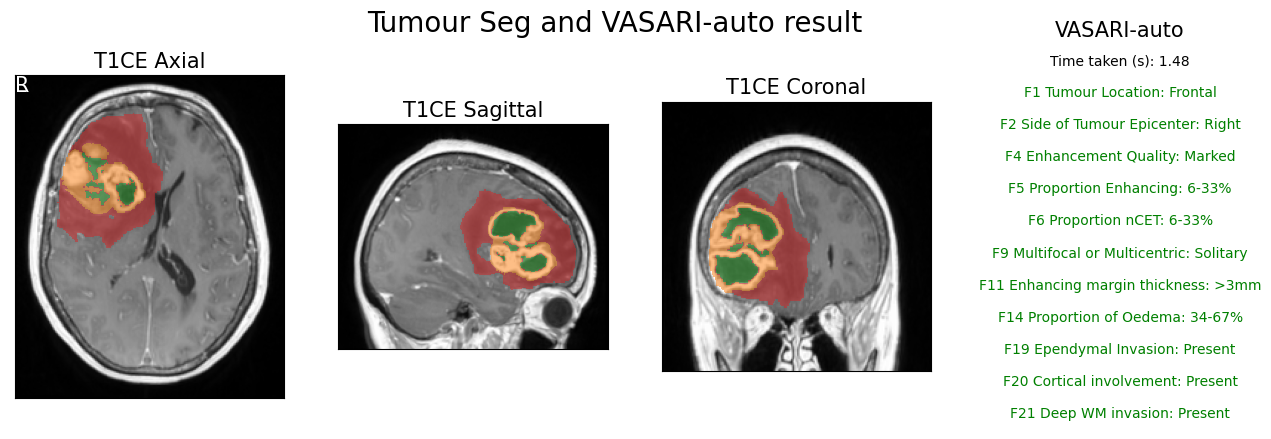

In [4]:
# Create a subplot with 4 rows and 4 columns

fontsize=10
i=0

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

for j, col in enumerate(use_these_cols_flipped):
    val_va = vasari_auto_report[col]

    if col=='F1 Tumour Location':
        val_va = f1_tumour_location_dict[int(val_va)]

    if col=='F2 Side of Tumour Epicenter':
        val_va = f2_side_of_tumour_epicenter_dict[int(val_va)]

    if col=='F4 Enhancement Quality':
        val_va = f4_enhancement_quality_dict[int(val_va)]

    if col=='F5 Proportion Enhancing':
        val_va = f5_proportion_enhancing_dict[int(val_va)]

    if col=='F6 Proportion nCET':
        val_va = f6_proportion_ncet_dict[int(val_va)]

    if col=='F9 Multifocal or Multicentric':
        val_va = f9_multifocal_or_multicentric_dict[int(val_va)]

    if col=='F11 Thickness of enhancing margin':
        val_va = f11_thickness_of_enhancing_margin_dict[int(val_va)]

    if col=='F14 Proportion of Oedema':
        val_va = f14_proportion_of_oedema_dict[int(val_va)]

    if col=='F19 Ependymal Invasion':
        val_va = f19_ependymal_invasion_dict[int(val_va)]

    if col=='F20 Cortical involvement':
        val_va = f20_cortical_involvement_dict[int(val_va)]

    if col=='F21 Deep WM invasion':
        val_va = f21_deep_wm_invasion_dict[int(val_va)]

    if col=='F24 satellites':
        val_va = f24_satellites_dict[int(val_va)]

    colour = 'green'
        
    if col=='time_taken_seconds':
        colour='black'
        title='Time taken (s)'
        val_va = val_va.values[0]
    elif col=='F11 Thickness of enhancing margin':
        title = 'F11 Enhancing margin thickness'
    else:
        title=col

    axes[3].text(0.5, (j+0.5)/len(use_these_cols_flipped), f"{title}: {val_va}", ha='center', va='center',fontsize=fontsize,color=colour)

    axes[3].axis('off')
    del col

    t1ce = np.asanyarray(nib.load(structural_file).dataobj)
    
    # Calculate the 5th and 95th percentile of t1ce
    percentile_5 = np.percentile(t1ce, .1)
    percentile_95 = np.percentile(t1ce, 99.9)

    # Clamp the t1ce array at the 5th and 95th percentile values
    t1ce = np.clip(t1ce, percentile_5, percentile_95)

    scaled_t1ce = (t1ce - t1ce.min()) / (t1ce.max() - t1ce.min())
    gt = np.asanyarray(nib.load(segmentation_file).dataobj)
 
    planes = [2,0,1]
    plane_counter=0
    for p in planes:
        most_common_value = np.bincount(np.nonzero(gt)[p]).argmax()
        if p==2:
            axes[plane_counter].imshow(np.rot90(scaled_t1ce[:,:,most_common_value]), cmap='gray')
            axes[plane_counter].imshow(np.rot90(np.where(gt[:,:,most_common_value] > 0, gt[:,:,most_common_value], np.nan)), cmap=mycmap, alpha=0.5, vmin=1)
        if p==0:
            axes[plane_counter].imshow(np.rot90(scaled_t1ce[most_common_value,:,:]), cmap='gray')
            axes[plane_counter].imshow(np.rot90(np.where(gt[most_common_value,:,:] > 0, gt[most_common_value,:,:], np.nan)), cmap=mycmap, alpha=0.5, vmin=1)
        if p==1:
            axes[plane_counter].imshow(np.rot90(scaled_t1ce[:,most_common_value,:]), cmap='gray')
            axes[plane_counter].imshow(np.rot90(np.where(gt[:,most_common_value,:] > 0, gt[:,most_common_value,:], np.nan)), cmap=mycmap, alpha=0.5, vmin=1)
                
        axes[plane_counter].grid(False)
        axes[plane_counter].set_xticks([])
        axes[plane_counter].set_yticks([])
        axes[plane_counter].margins(x=0)
        plane_counter+=1
    
axes[0].text(0, 1, 'R', transform=axes[0].transAxes, fontsize=fontsize*1.5, color='white', ha='left', va='top')
axes[1].text(0, 1, 'L', transform=axes[0].transAxes, fontsize=fontsize*1.5, color='white', ha='left', va='top')
axes[0].set_title("T1CE Axial",fontsize=fontsize*1.5)
axes[1].set_title("T1CE Sagittal",fontsize=fontsize*1.5)
axes[2].set_title("T1CE Coronal",fontsize=fontsize*1.5)
axes[3].set_title("VASARI-auto",fontsize=fontsize*1.5)

fig.suptitle('Tumour Seg and VASARI-auto result',y=0.95,x=0.5,fontsize=fontsize*2)
plt.subplots_adjust(hspace=0.1)
plt.show()
